# Kaggle example

In [60]:
# https://www.kaggle.com/amarpreetsingh/stock-prediction-lstm-using-keras

# with some fixes...

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls -l", "../data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Archive.zip
all_stocks_5yr.csv
all_stocks_5yr.csv.zip
cleaned.csv
int-combined.csv
int-rate-1995.csv
int-rate-1996.csv
int-rate-1997.csv
int-rate-1998.csv
int-rate-1999.csv
int-rate-2000.csv
int-rate-2001.csv
int-rate-2002.csv
int-rate-2003.csv
int-rate-2004.csv
int-rate-2005.csv
int-rate-2006.csv
int-rate-2007.csv
int-rate-2008.csv
int-rate-2009.csv
int-rate-2010.csv
int-rate-2011.csv
int-rate-2012.csv
int-rate-2013.csv
int-rate-2014.csv
int-rate-2015.csv
int-rate-2016.csv
int-rate-2017.csv
merged.csv
merged_irate.csv
pollution.csv
raw.csv
spy.csv
vix.csv
vixarchive.csv
vixarchive.xlsx
vixcurrent.csv



In [11]:
data = pd.read_csv('../data/all_stocks_5yr.csv')
cl = data[data['Name']=='MMM'].close

In [18]:
cl[:10]
cl.shape

(1259,)

In [23]:
scl = MinMaxScaler()
#Scale the data
cl = cl.values.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.00580061],
       [0.00554564],
       [0.01090005],
       ...,
       [0.82668281],
       [0.84064253],
       [0.83783784]])

In [61]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

lb = 7
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

X_train[:5]
#y_train[:5]


990
248
990
248


array([[0.00580061, 0.00554564, 0.01090005, 0.00707547, 0.00656553,
        0.00943396, 0.01548955, 0.00892402, 0.00618307, 0.01140999,
        0.        , 0.00356961, 0.01160122, 0.01434217, 0.01287608,
        0.00975268, 0.01721061, 0.01854921, 0.01778429, 0.02524222],
       [0.00554564, 0.01090005, 0.00707547, 0.00656553, 0.00943396,
        0.01548955, 0.00892402, 0.00618307, 0.01140999, 0.        ,
        0.00356961, 0.01160122, 0.01434217, 0.01287608, 0.00975268,
        0.01721061, 0.01854921, 0.01778429, 0.02524222, 0.02587965],
       [0.01090005, 0.00707547, 0.00656553, 0.00943396, 0.01548955,
        0.00892402, 0.00618307, 0.01140999, 0.        , 0.00356961,
        0.01160122, 0.01434217, 0.01287608, 0.00975268, 0.01721061,
        0.01854921, 0.01778429, 0.02524222, 0.02587965, 0.02154513],
       [0.00707547, 0.00656553, 0.00943396, 0.01548955, 0.00892402,
        0.00618307, 0.01140999, 0.        , 0.00356961, 0.01160122,
        0.01434217, 0.01287608, 0.00975268, 0

In [ ]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 990 samples, validate on 248 samples
Epoch 1/300
990/990 [==============================] - 4s 4ms/step - loss: 7.7105e-04 - val_loss: 0.0096
Epoch 2/300
990/990 [==============================] - 2s 2ms/step - loss: 0.0031 - val_loss: 0.0141
Epoch 3/300
990/990 [==============================] - 2s 2ms/step - loss: 0.0027 - val_loss: 9.8931e-04
Epoch 4/300
990/990 [==============================] - 2s 2ms/step - loss: 0.0029 - val_loss: 9.7228e-04
Epoch 5/300
990/990 [==============================] - 3s 3ms/step - loss: 0.0018 - val_loss: 5.3124e-04
Epoch 6/300
990/990 [==============================] - 2s 2ms/step - loss: 3.6958e-04 - val_loss: 5.9136e-04
Epoch 7/300
990/990 [==============================] - 2s 2ms/step - loss: 3.3934e-04 - val_loss: 9.7623e-04
Epoch 8/300
990/990 [==============================] - 3s 3ms/step - loss: 2.6680e-04 - val_loss: 5.2694e-04
Epoch 9/300
990/990 [==============================] - 2s 3ms/step - loss: 2.4168e-04 - val_loss: 5.7944e-

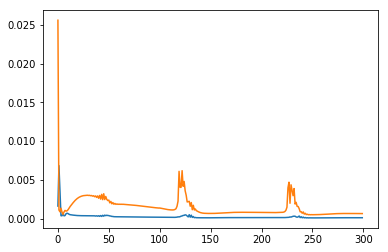

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [33]:
X_test[0]

array([0.46959459, 0.46577002, 0.46800102, 0.46169046, 0.46717236,
       0.46755482, 0.47176186])

(251, 7)


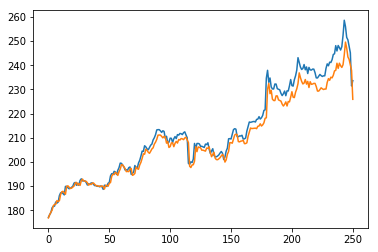

In [45]:
Xt = model.predict(X_test.reshape(-1,7,1))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [56]:
act = []
pred = []
for i in range(250):
#i=249
    Xt = model.predict(X_test[i].reshape(1,7,1))
    print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[176.827]], actual:[[177.07]]
predicted:[[178.09036]], actual:[[178.18]]
predicted:[[179.19138]], actual:[[179.]]
predicted:[[179.96576]], actual:[[181.02]]
predicted:[[181.85156]], actual:[[181.6]]
predicted:[[182.42316]], actual:[[181.7]]
predicted:[[182.46318]], actual:[[183.41]]
predicted:[[184.0027]], actual:[[182.95]]
predicted:[[183.60345]], actual:[[183.37]]
predicted:[[183.94307]], actual:[[186.04]]
predicted:[[186.45117]], actual:[[187.19]]
predicted:[[187.63432]], actual:[[187.41]]
predicted:[[187.83133]], actual:[[186.91]]
predicted:[[187.25945]], actual:[[186.35]]
predicted:[[186.62825]], actual:[[189.86]]
predicted:[[189.9104]], actual:[[189.89]]
predicted:[[190.10114]], actual:[[189.31]]
predicted:[[189.53949]], actual:[[188.9]]
predicted:[[189.01625]], actual:[[189.09]]
predicted:[[189.13853]], actual:[[189.51]]
predicted:[[189.56383]], actual:[[189.9]]
predicted:[[189.98825]], actual:[[191.21]]
predicted:[[191.22543]], actual:[[191.52]]
predicted:[[191.53152

predicted:[[229.30312]], actual:[[235.45]]
predicted:[[229.94516]], actual:[[236.2]]
predicted:[[230.67043]], actual:[[235.72]]
predicted:[[230.2634]], actual:[[235.37]]
predicted:[[229.96393]], actual:[[235.64]]
predicted:[[230.16806]], actual:[[235.63]]
predicted:[[230.1489]], actual:[[238.71]]
predicted:[[232.91069]], actual:[[240.57]]
predicted:[[234.45537]], actual:[[239.79]]
predicted:[[233.77136]], actual:[[241.28]]
predicted:[[235.06697]], actual:[[241.14]]
predicted:[[234.7906]], actual:[[242.31]]
predicted:[[235.8623]], actual:[[244.47]]
predicted:[[237.68596]], actual:[[244.74]]
predicted:[[237.86984]], actual:[[248.11]]
predicted:[[240.84148]], actual:[[245.91]]
predicted:[[238.70694]], actual:[[248.18]]
predicted:[[240.85793]], actual:[[247.3]]
predicted:[[239.81607]], actual:[[246.31]]
predicted:[[239.0961]], actual:[[247.69]]
predicted:[[240.25703]], actual:[[252.36]]
predicted:[[244.29298]], actual:[[258.63]]
predicted:[[249.58798]], actual:[[256.01]]
predicted:[[247.10

In [57]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

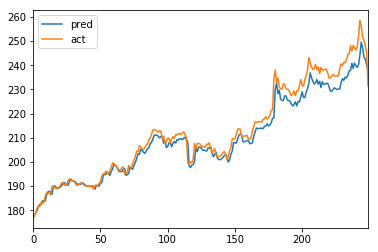

In [58]:
result_df.plot(kind='line')

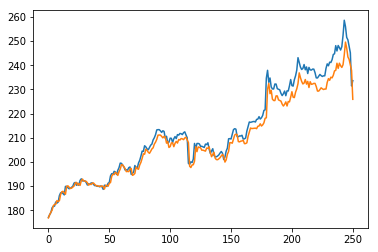

In [59]:
Xt = model.predict(X_test.reshape(-1,7,1))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [52]:
X_test[249]

array([0.96003315, 1.        , 0.98329934, 0.95480622, 0.94817695,
       0.93185875, 0.91420194])

In [53]:
X_test[248]

array([0.93026517, 0.96003315, 1.        , 0.98329934, 0.95480622,
       0.94817695, 0.93185875])